In [151]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import sklearn
from sklearn.decomposition import PCA
import scipy
import collections

DataTup = collections.namedtuple("DataTup",
                                      "samples actions aa")

# data/seq_102372, data_z/seq_102372, data_compri/seq_4000

# data = np.load("data_compri/seq_4000.npy")
# data = np.load("data/seq_102372.npy")
# data = np.load("means/1j/seq_66692.npy")
# data = np.load("samples/1j/seq_66692.npy")

data_means = np.load("./kl02/z_means/seq_102372.npy")
# data = np.load("./kl02/z_samples/seq_102372.npy")
data_a = np.load("./kl02/actions/seq_102372.npy")
data_aa = np.load("./kl02/aa/seq_102372.npy")
data_comp_z = np.load("./kl02/comp_z/seq_102372.npy")

data_means = np.load("./2good/z_means/seq_92821.npy")
# data = np.load("./2good/z_samples/seq_92821.npy")
data_a = np.load("./2good/actions/seq_92821.npy")
data_aa = np.load("./2good/aa/seq_92821.npy")

# data_means = np.load("./add/z_means/seq_200002.npy")
# # data = np.load("./add/z_samples/seq_200002.npy")
# data_a = np.load("./add/actions/seq_200002.npy")
# data_aa = np.load("./add/aa/seq_200002.npy")
# data_comp_z = np.load("./add/comp_z/seq_200002.npy")

# data_means = np.load("./traj/z_means/seq_33754.npy")
# # data = np.load("./traj/z_samples/seq_33754.npy")
# data_a = np.load("./traj/actions/seq_33754.npy")
# data_aa = np.load("./traj/aa/seq_33754.npy")
# data_comp_z = np.load("./traj/comp_z/seq_33754.npy")
# data_comp_z = data_comp_z[...,:-1]

data2p = DataTup(samples=np.reshape(data_means[1:], [-1,10]),
                 actions=np.reshape(data_a[1:], [-1,2]),
                 aa=np.reshape(data_aa[:-1], [-1,2]))

data2 = DataTup(samples=np.reshape(data_means, [-1,10]),
                actions=np.reshape(data_a, [-1,2]),
                aa=np.reshape(data_aa, [-1,2]))

# comp = np.linspace(0,8,3, dtype=int)

# data_comp2 = DataTup(samples=np.reshape(data_comp_z, [-1,10]),
#                     actions=np.reshape(data_a[comp]+data_a[comp+1]+data_a[comp+2]+data_a[comp+3], [-1,2]),
#                     aa=np.reshape(data_a[comp]+data_a[comp+1]+data_a[comp+2]+data_a[comp+3], [-1,2]))


flat =(data_means.flatten())

In [61]:
comp

array([0, 4, 8])

In [213]:
print(flat.mean(), flat.std())
print(data2.mean(axis=0))
print(data2.std(axis=0))

7.88786e-05 1.00508
[  5.50392224e-03  -1.67035859e-03   1.22751785e-03   4.74206499e-05
   3.44266649e-03   3.05341347e-03  -1.25841023e-02   9.34556068e-04
  -1.41271914e-03   2.24649347e-03]
[ 1.00197232  1.00057232  1.00021517  1.00496566  0.99584836  0.99960881
  1.02611148  1.02228653  0.99909288  0.99930841]


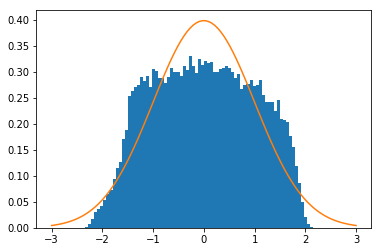

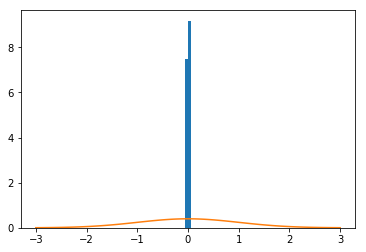

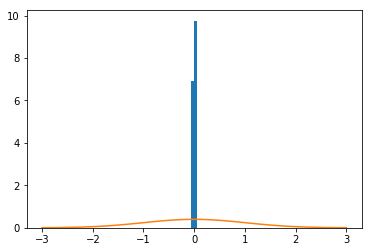

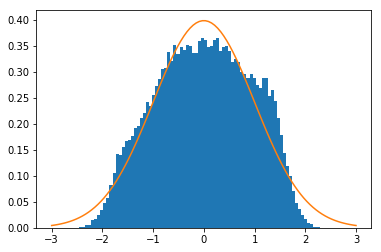

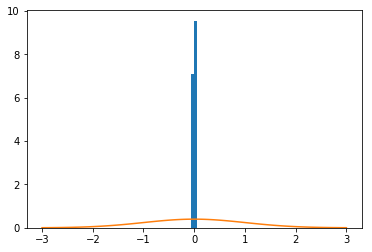

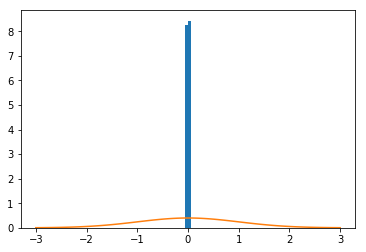

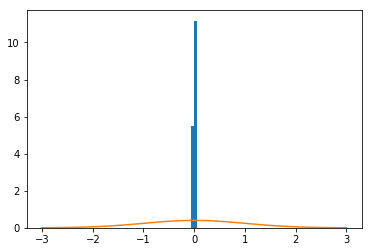

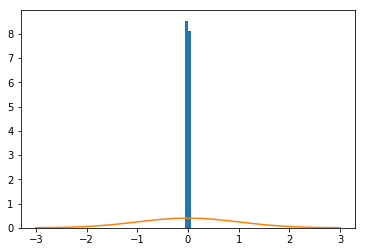

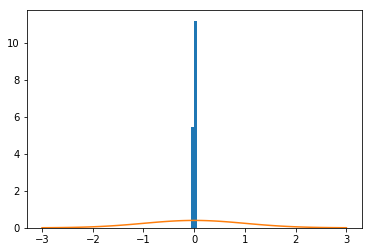

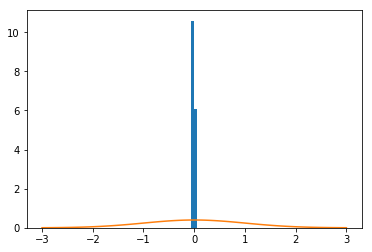

In [123]:
# 1d slices

data = data2 # data_comp2

R = np.random.rand(10,10)
U,_,V = np.linalg.svd(R)
R = U.dot(V)

data2r = data.samples #.dot(R)
for i in range(10):
    plt.hist(data2r[:,i], bins=100, range=[-3,3], density=True)
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.show()

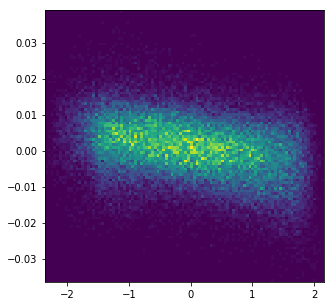

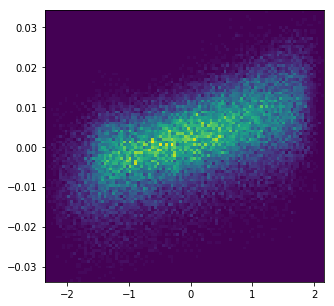

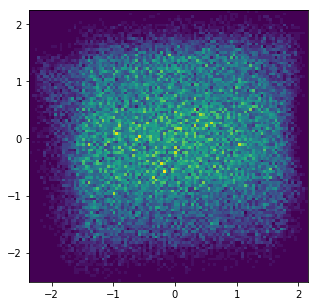

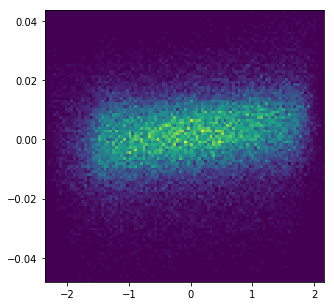

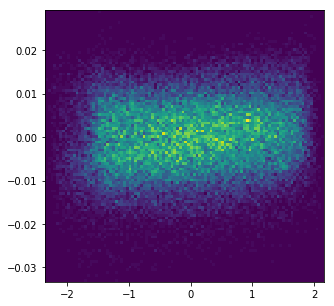

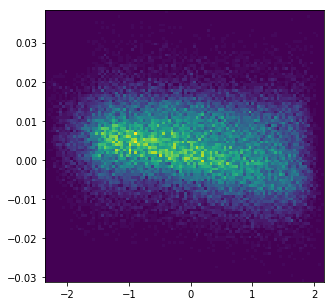

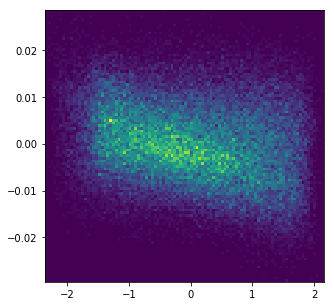

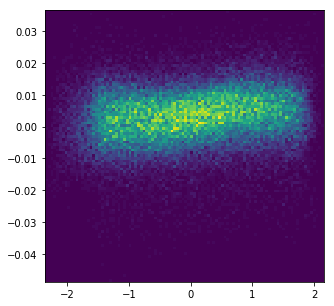

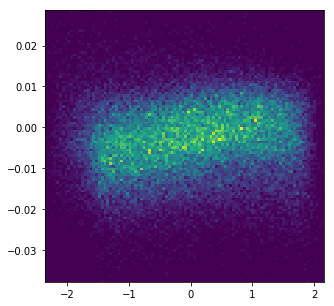

In [5]:
# 2d slices
data = data2 # data_comp2
for i in range(9):
    plt.figure(figsize=[5,5])
    data2r = data.samples #.dot(R)
    plt.hist2d(data2r[:,0],data2r[:,i+1], bins=100) #, range=[[-3,3],[-3,3]]
    plt.show()
#     plt.figure(figsize=[5,5])
#     plt.hist2d(data_prior[:,0],data_prior[:,i+1], range=[[-3,3],[-3,3]], bins=100)
    plt.show()

In [152]:
data=data2 #data2p
pca = PCA(n_components=2)
pca.fit(data.samples)
data2_reduced=pca.transform(data2.samples) #data_comp2
print(pca.explained_variance_ratio_)

[ 0.54044896  0.45931443]


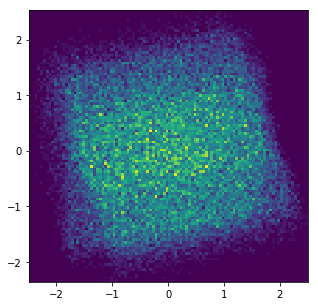

In [153]:
# 2d PCA
plt.figure(figsize=[5,5])
plt.hist2d(data2_reduced[:,0],data2_reduced[:,1],  bins=100) #range=[[-3,3],[-3,3]],
plt.show()

In [118]:
# compare moments
def get_moments(data, n):
    sample=np.zeros(n)
    prior=np.array([0,1,0,3,0,15,0,105,0,945])
    for i in range(n):
        sample[i] = scipy.stats.moment(data, moment=i+1)
    return (sample-prior)
 
print(get_moments(flat,10))

[  0.00000000e+00  -8.03113345e-01  -1.10963418e-02  -2.47045869e+00
  -8.69936473e-02  -1.28375480e+01  -7.20943341e-01  -9.36016420e+01
  -6.37392309e+00  -8.73065480e+02]


In [136]:
# Get samples corresponding to a certain angle of the second image x2
def get_cond_points(data,cond_angle,eps=0.1):
    cond_points=np.logical_and((data.aa[:,0]>(cond_angle-eps)), data.aa[:,0]<(cond_angle+eps))
#     plt.hist(data_aa2[cond_points,0], bins=100)
#     plt.show()
    return cond_points

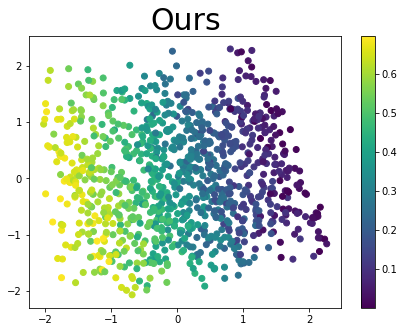

In [154]:
# Print a scatter plot with annotated actions
data = data2 # data_comp2
def plot_sample(data, sample):
    fig=plt.figure(figsize=[7,5])
    plt.scatter(data2_reduced[sample,0],data2_reduced[sample,1], c=data.actions[sample,0])  
    plt.colorbar()
    plt.title("Ours", size=30) #Baseline
    plt.show()
    return fig
sample = np.random.choice(data.samples.shape[0], 1000)
# for i in np.linspace(0*math.pi,0*math.pi,10):
#     plot_sample(data, get_cond_points(data, 1, 0.5))
fig=plot_sample(data, sample)
fig.savefig("pca_structured.eps", transparent=True)
# 

In [52]:
data.samples.shape

(36000, 10)

In [244]:
# Train a probe network to distinguish between prior and inference
import numpy
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

data_prior = np.random.randn(14*12000,10)

temporal = False
if temporal:
    data_1st = np.reshape(np.transpose(data, [1, 0, 2]), [-1,140]) # data2
    data_2nd = np.reshape(data_prior, [-1,140]) # data_prior
    input_dim = 140
else:
    data_1st = data2
    data_2nd = data_prior
    input_dim = 10
X = np.concatenate([data_1st, data_2nd], axis=0)
Y = np.concatenate([np.zeros(data_1st.shape[0]), np.ones(data_2nd.shape[0])], axis=0)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=input_dim, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=1, batch_size=5, verbose=0)

estimator.fit(x=X, y=dummy_y, verbose=1)

In [206]:
dummy_y.shape

(24000, 2)

In [210]:
np.min(flat)

0.0